<a href="https://colab.research.google.com/github/thiagofst/LE/blob/main/polytropes_LE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Lane-Emden equation

### Stellar radius and density

The Lane-Emden equation (LE) describe the internal structure of a self-gravitating polytropic object. The equation takes the form

$ \frac{1}{\xi^2} \frac{d}{d\xi} \left(\xi^2 \frac{d\theta}{d\xi}\right) + \theta^n = 0,$

with $\xi$ representing the objects' dimensionless radius and $\theta$ is a parameter related to its density, thus the pressure following $\rho = \rho_c \theta^n$ for a central density $\rho_c$. The index $n$ is called *polytrope index* and appears in a *polytrope equation of state*

$P = K \rho^{1+\frac{1}{n}}.$

The standard Dirichlet and Neumann boundary conditions for LE are $\theta(0) = 1$ and $\theta'(0) = 0$. 

In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.integrate import odeint
from astropy.constants import R_sun, M_sun

In [20]:
R = R_sun.value
M = M_sun.value

In [21]:
%matplotlib inline

In [22]:
sns.set_style('whitegrid')

It solves a differential equation in form $y' - f(x,y) = 0$ at some point $x_f$. 
For the case of Lane-Emden differential equation, we sould first make the substitution $Z = \frac{d\xi}{d\theta}$. Then we get something like $Z' = -D_n^{n} - \frac{2Z}{x}$. 

In [23]:
def solve_LE(n):

    # Theta and xi values
    theta_values = []
    xi_values = []
    
    # Define initial values of xi, delta-xi, the gradient and theta
    xi = 0.00001
    d_xi = 0.001
    dtheta = 0
    theta = 1
    
    # New variable to store xi
    xi_now = xi
    
    # "while" loop to find theta and xi values until theta reaches -0.5.
    while (theta >= -0.5) and (xi_now < 20):
        
        # Increase xi value by small amount
        xi_now = xi_now + d_xi
    
        # Calculate values after small increase in xi
        dtheta_next = dtheta - (((2/xi_now)*dtheta)+theta**n)*d_xi
        theta_next = theta + dtheta_next*d_xi

        # Old values > new ones
        dtheta = dtheta_next
        theta  = theta_next
        
        # Append
        theta_values.append(theta)
        xi_values.append(xi_now)
    
    # Lists to arrays conversion
    xi_values = np.array(xi_values)
    theta_values = np.array(theta_values)
    return (xi_values, theta_values)

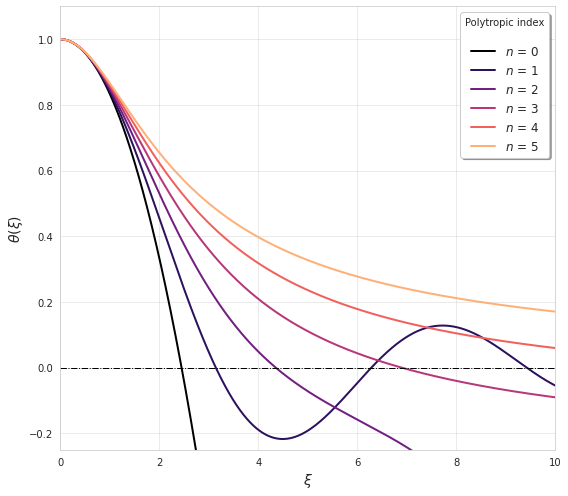

In [28]:
fig, ax = plt.subplots(figsize = (8, 7))

ax.grid(alpha = 0.5)
ax.set_xlabel(r'$\xi$', fontsize = 14)
ax.set_ylabel(r'$\theta(\xi)$', fontsize = 14)

ax.set_ylim(-0.25, 1.1)
ax.set_xlim(0, 10)

colors = plt.cm.magma(np.linspace(0, 1, 7))

for i in range(6):
  ax.plot(solve_LE(i)[0], solve_LE(i)[1], 
          lw = 2, 
          c = colors[i], 
          ls = 'solid', 
          label = f'$n$ = {i}')

ax.axhline(0, 
           lw = 1.0, 
           color = 'black', 
           ls = 'dashdot')

plt.legend(loc = 'upper right', 
           fontsize = 12, 
           shadow = True, 
           markerscale = 1., 
           title = 'Polytropic index\n')

plt.tight_layout()
plt.savefig('polytrope_LE.pdf')

It is well known that LE is analytical just for $n = 0, 1$ and $5$. Let us make a comparison between analytical and numerical solutions.

*Recommended reading: Chandrasekhar, S., 1939,  An introduction to the study of stellar structure, The University of Chicago Press.*)


In [25]:
le0 = lambda xi: 1. - ((1./6.)*xi**2.) 		    	# n = 0
le1 = lambda xi: np.sin(xi)/xi 					        # n = 1
le5 = lambda xi: 1./np.sqrt(1. + ((xi**2)/3)) 	# n = 5mb

In [26]:
xii = np.linspace(0, 10, 100) # Choose a set of adimensional radius

theta0_ = le0(xii) # theta_0 (xi)
theta1_ = le1(xii) # theta_1 (xi)
theta5_ = le5(xii) # theta_5 (xi)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


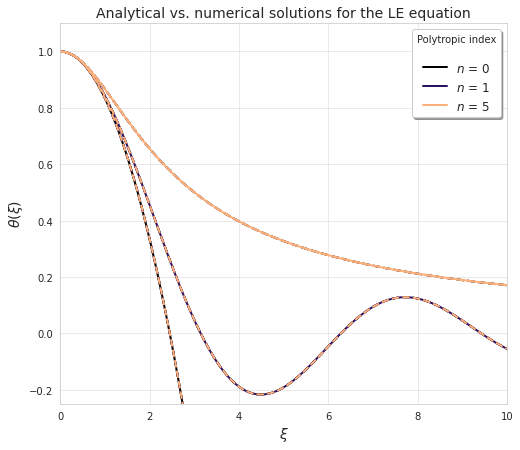

In [27]:
fig, ax = plt.subplots(figsize = (8, 7))

ax.grid(alpha = 0.5)
ax.set_xlabel(r'$\xi$', fontsize = 14)
ax.set_ylabel(r'$\theta(\xi)$', fontsize = 14)

colors = plt.cm.magma(np.linspace(0, 1, 7))

ax.set_ylim(-0.25, 1.1)
ax.set_xlim(0, 10)

ax.set_title('Analytical vs. numerical solutions for the LE equation', 
             fontsize = 14, 
             loc = 'center')


for i in [0, 1, 5]:
  ax.plot(solve_LE(i)[0], solve_LE(i)[1], lw = 2, c = colors[i], ls = 'solid', label = f'$n$ = {i}')
  ax.plot(xii, theta0_, lw = 2.0, color = colors[i], ls = 'dashed')
  ax.plot(xii, theta1_, lw = 2.0, color = colors[i], ls = 'dashed')
  ax.plot(xii, theta5_, lw = 2.0, color = colors[i], ls = 'dashed')

plt.legend(loc = 'upper right', 
           fontsize = 12, 
           shadow = True, 
           markerscale = 1., 
           title = 'Polytropic index\n')

plt.savefig('polytrope_LE_analytical_numerical.png', dpi = 300)